### Telco Customer Churn

A dataset with three main groups of information about customers and our goal is to decipher what contributes to churn/ retention


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 1. Demographic


Which 2 demographics have proven to be the most popular with the telco brand?If the marketing team wanted to increase customer retention, to whom should 
they target their advertisements to?


In [5]:
#create a list of all the demographic information
demographics  = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

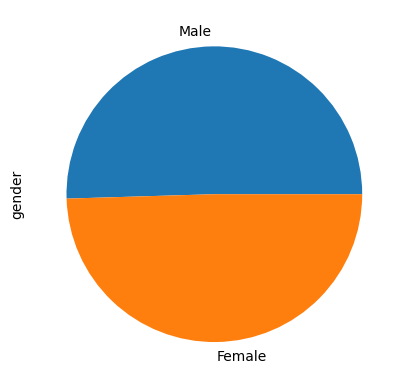

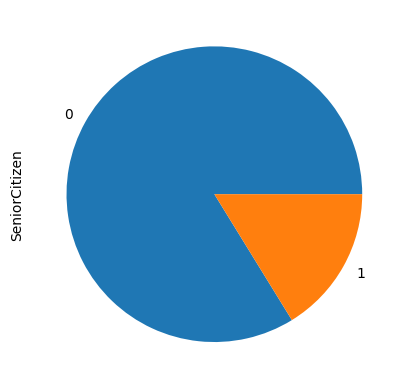

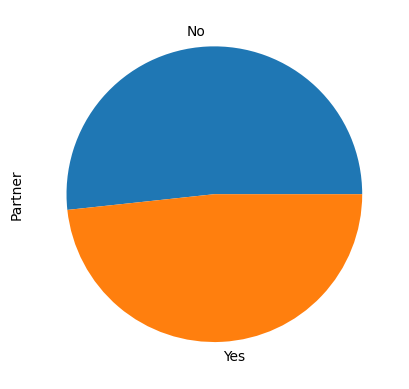

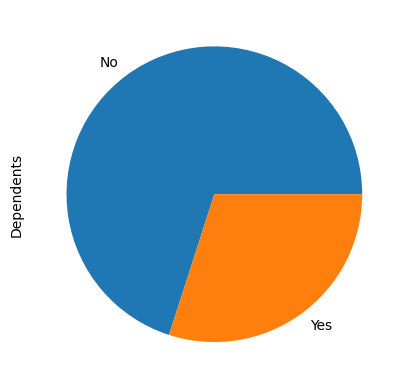

In [7]:
# A simple value counts without considering churn would be a valid answer for question a) and you could plot it out as a pie chart
for column in demographics:
    data[column].value_counts().plot(kind='pie')
    plt.show()

For question a) 2 popular demograhies are youths(non-senior citizens) and persons with no dependents.

In [28]:
# Alternatively you could plot it out as a bar chart
# for column in demographics:
#     data[column].value_counts().plot(kind='bar')
#     plt.show()

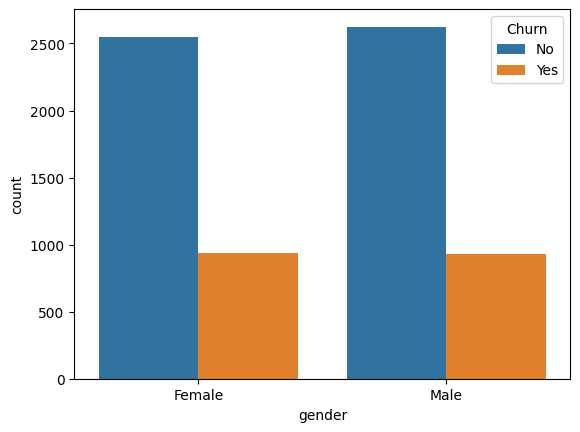

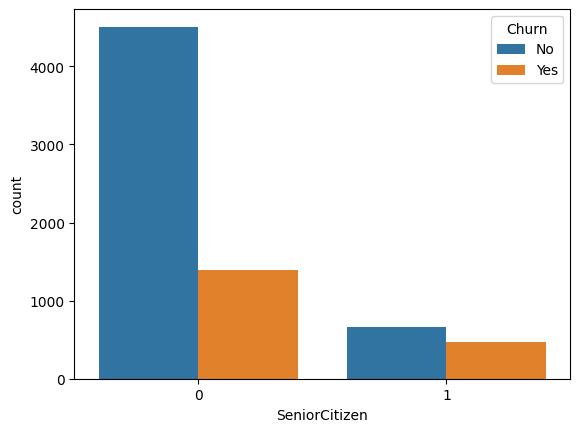

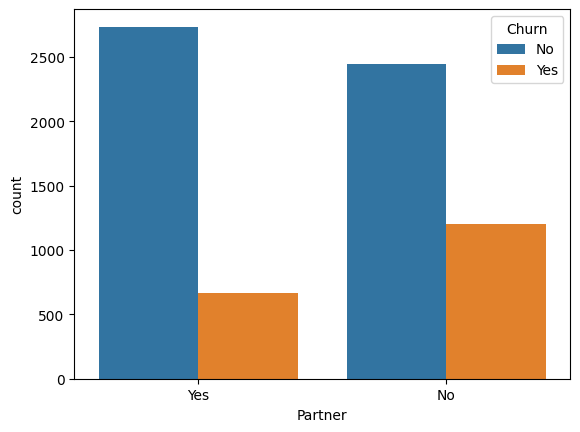

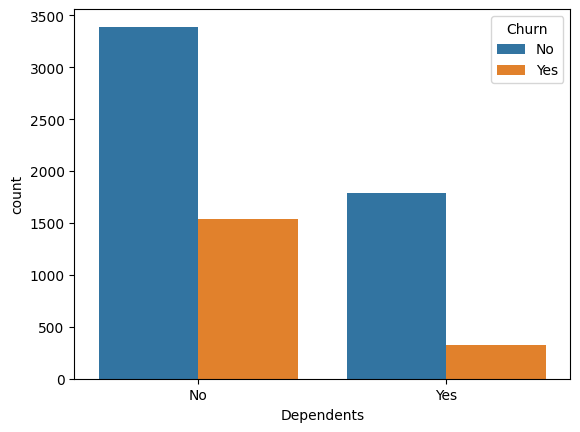

In [8]:
# Seeing as all columns are categorical a simple countplot(seaborn's approach of displaying value_counts as graphs) would work well here
# We loop over the columns and plot the counts to add more context we could add hue to also see the chrun:retention ratio
for column in demographics:
    sns.countplot(data =data, x=column, hue="Churn")
    plt.show()




For question b) the marketing team should target ads to new cutomers who fall under the most retained demographies e.g. young people and persons with partners and those with no dependents 

### 2. Services


#### Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)



In [10]:
# Create a list of services of all services
services =['PhoneService', 'MultipleLines', 'InternetService', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

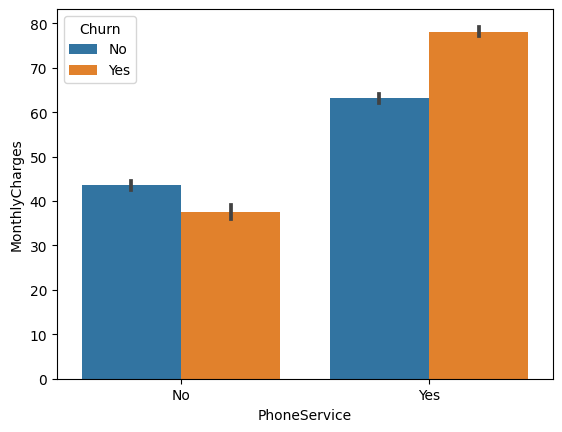

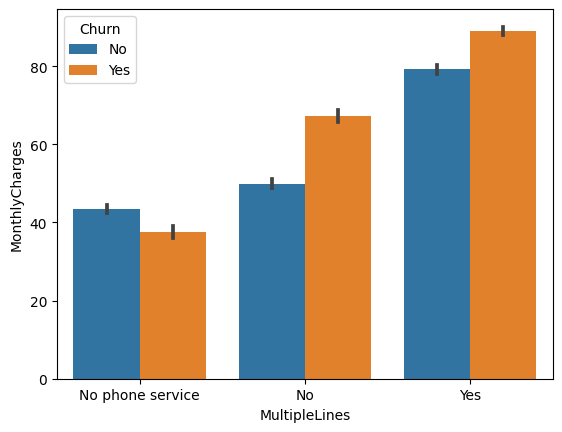

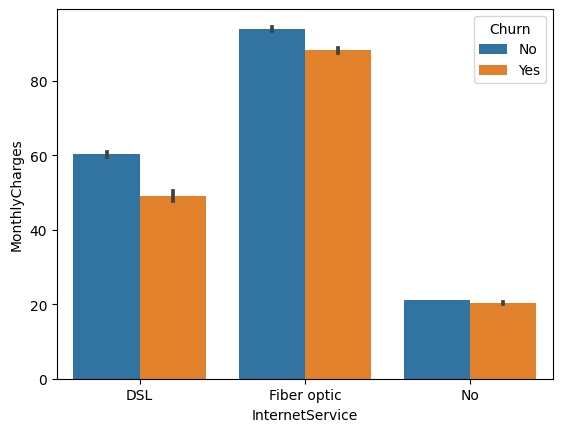

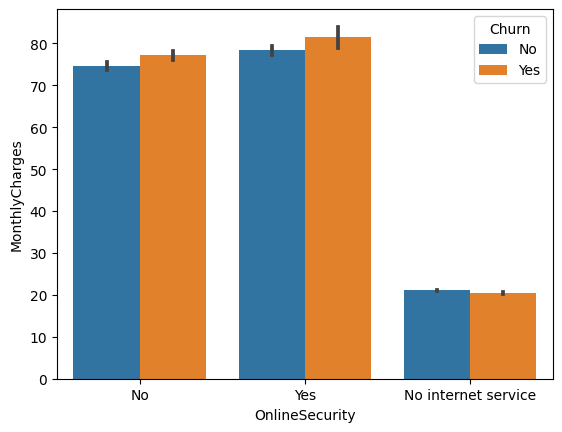

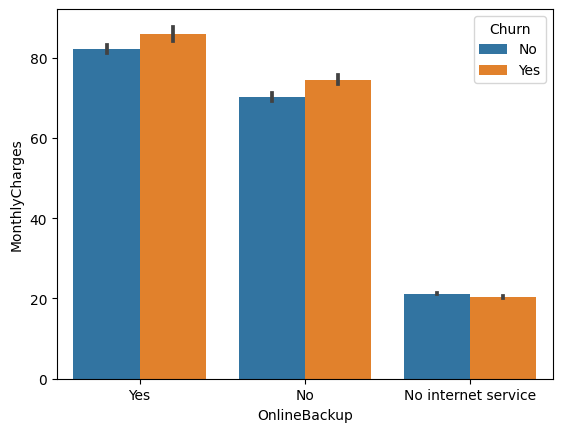

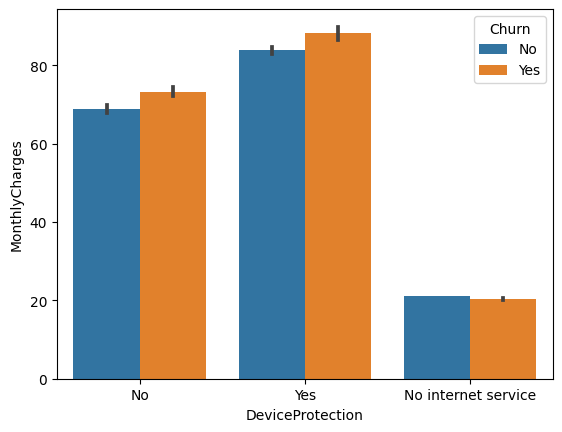

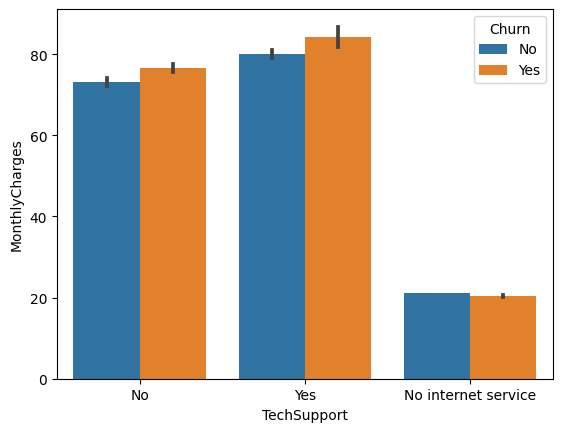

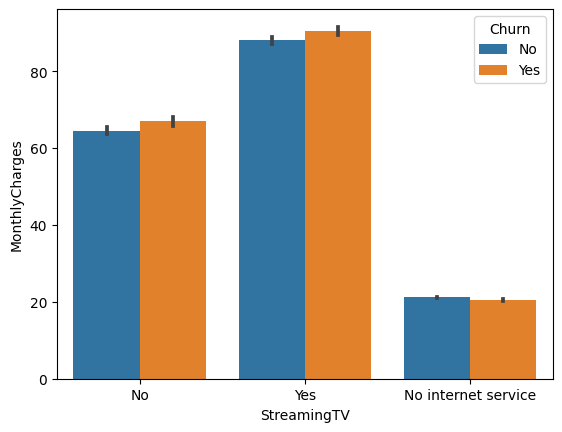

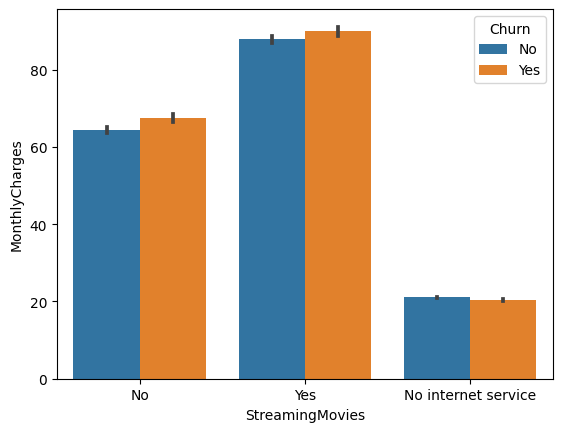

In [11]:
# Alternative A: Use the seaborn barplot and use all services(yes, no, other) to see average monthly charges
for service in services:
    sns.barplot(data = data, x=service, y="MonthlyCharges", hue="Churn")
    plt.show()

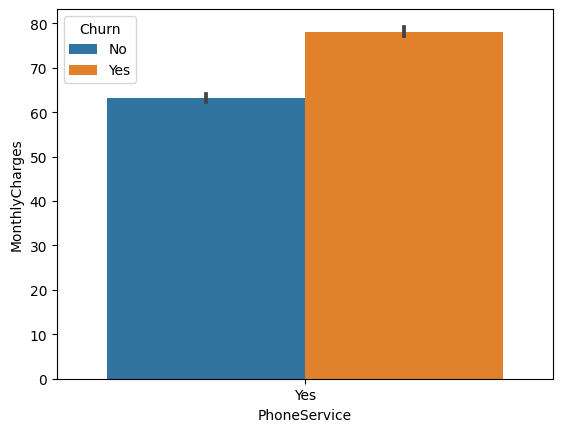

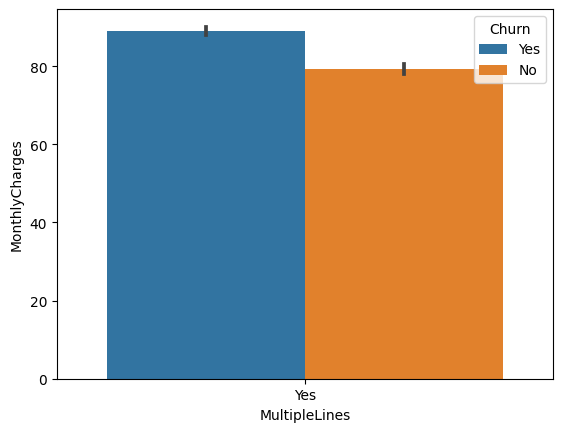

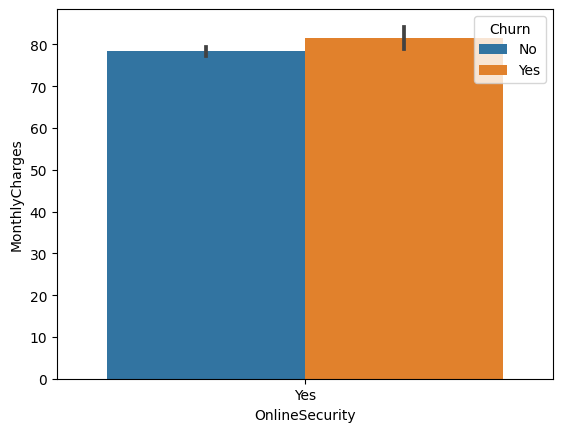

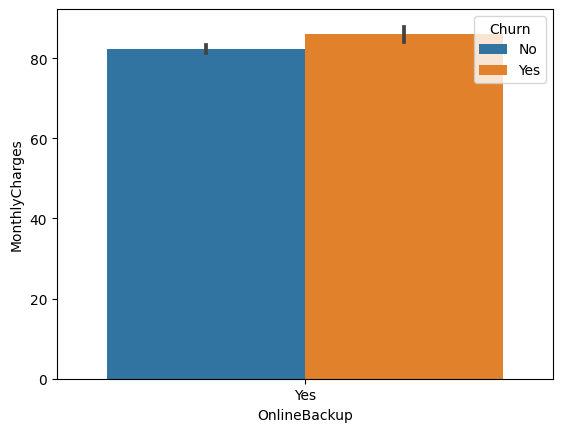

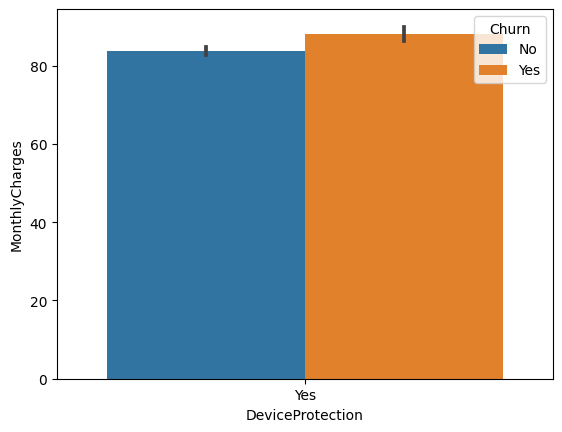

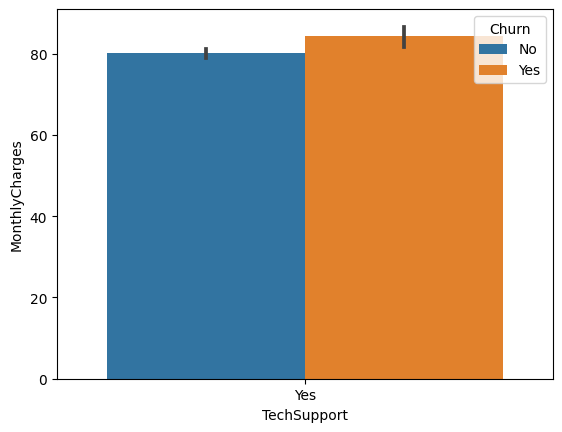

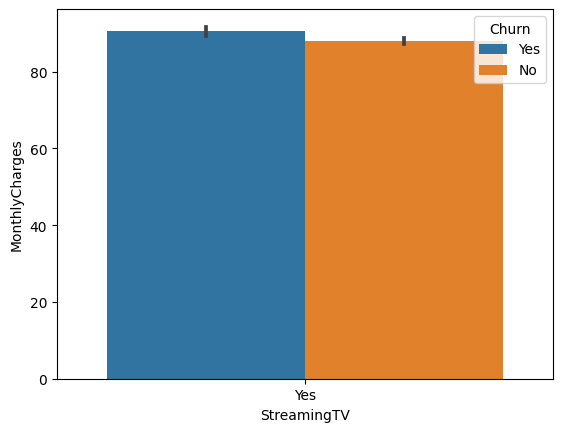

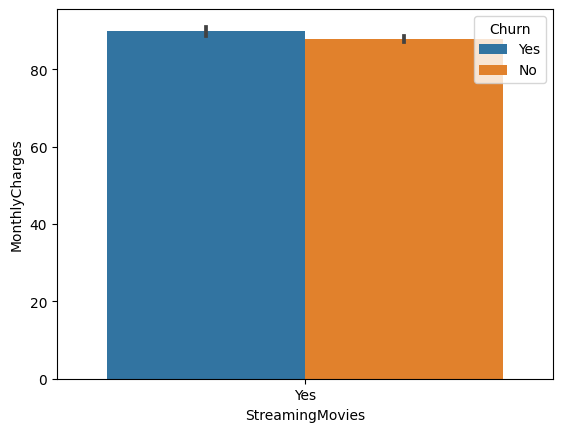

In [12]:
# Alternative 2: use all services except internet service and filter on service category yes and show a barplot of monthly averagr charges 
services =['PhoneService', 'MultipleLines',  
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
for service in services:
    data1 = data[data[service] == 'Yes']
    sns.barplot(data = data1, x=service, y="MonthlyCharges", hue="Churn")
    plt.show()

All services except Internet Services ted to contrinute to high monthly charge and hence customer churn

#### If the telco was to offer Phone as a standalone service, which type of contract  would encourage customer retention?

<Axes: xlabel='Contract', ylabel='count'>

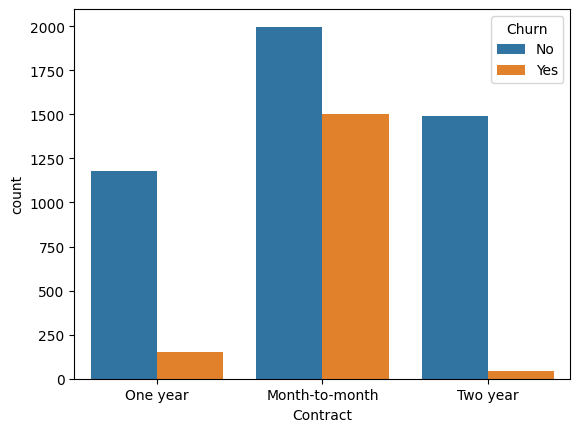

In [32]:
data2 = data[data["PhoneService"] == "Yes"]
sns.countplot(data=data2, x="Contract", hue="Churn")

A two year contract would be the best option with high retention and low churn rate

### 3. Payment: (Use visualizations in explaining your analysis)


#### If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:




i. Basic


ii. Plus


iii. Premium




In [14]:
import plotly.express as px

In [19]:
# A histogram or box plot would be helpful here since we are essentially exploring a numerical column
fig = px.histogram(data, x="MonthlyCharges", color="Churn", nbins=25)
fig.update_layout(barmode='overlay')

Basic: 20$

Plus: 60$ /59.99$

Premium: 80$

#### Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

<Axes: xlabel='PaperlessBilling', ylabel='count'>

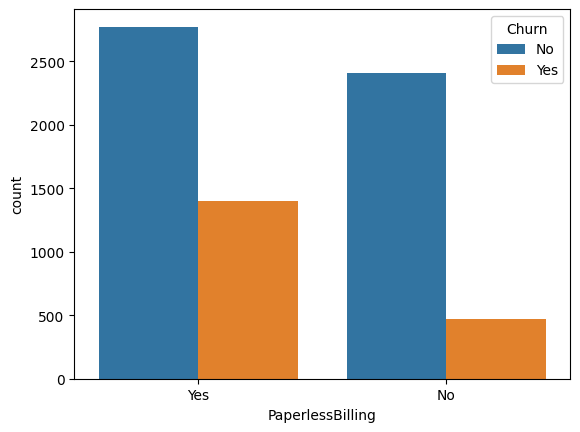

In [38]:
sns.countplot(data=data, x="PaperlessBilling", hue="Churn")

The company shouldn't go paperless since with that kind of billing the churn rate is extremely high